<h1> Dye Test </h1>

In this test, we will be making a soln using two different dye sols. 

The is the procedure:
0. Initialise machine 
1. Home Jubilee
2. Load tools
3. Fill Dual syringe with dye
4. Place lid on precursors
5. Fill vial with solvent 
6. Fill vial with precursors
7. Mix the vial
8. Record vial spectrometer data 2 times

In [1]:
# Import libs

# Importing libraries
import numpy as np
import time 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd


from science_jubilee.Machine import Machine
from science_jubilee.tools.Tool import Tool
from science_jubilee.decks.Deck import Deck
from science_jubilee.labware.Labware import Labware, Location, Well
# from science_jubilee.tools.Pipette import Pipette
from science_jubilee.tools.Double_Syringe import DoubleSyringe
from science_jubilee.tools.Syringe import Syringe
from science_jubilee.tools.Vacuum_Gripper import VacuumGripper
from science_jubilee.tools.Oceandirect_axo import Spectrometer

In [2]:
# Manual Offsetting 

deck = Deck("lab_automation_deck") # We are not using the deck, so operate any deck.json 

# -------------Position JSON file for Single Syringe ---------------------#
samples2_ssy = deck.load_labware("uwsunlab_10_wellplate_11000ul_ssy_1.json", slot = 2)
samples2_ssy.manual_offset2([[132.0, 134.0], [38.0, 134.0], [38.0, 175.0]], save = True)
samples5_ssy = deck.load_labware("uwsunlab_10_wellplate_11000ul_ssy_2.json", slot = 5)
samples5_ssy.manual_offset2([[271.0, 231.0], [177.0, 231.0], [177.0, 273.0]], save = True)
solvents = deck.load_labware("uwsunlab_2_wellplate_60000ul_slot3.json", slot = 3)
solvents.manual_offset_small_plate([[245.0, 155.8], [197.0, 155.8]], save = True)
    
# -------------Position JSON file for Dual Syringe ---------------#
samples2_sy = deck.load_labware('uwsunlab_10_wellplate_11000ul_sy_1.json', slot = 2)     #new config
samples2_sy.manual_offset2([[130.7, 131.6],[37.7, 131.6], [37.7, 172.6]], save = True)
samples5_sy = deck.load_labware('uwsunlab_10_wellplate_11000ul_sy_2.json', slot = 5)     #new config
samples5_sy.manual_offset2([[270.0, 228.0], [178.0, 228.0], [177.0, 270.0]], save = True)
precursors = deck.load_labware('uwsunlab_2_wellplate_60000ul_slot1.json', slot = 1)
precursors.manual_offset_small_plate([[245.0, 60.0], [197.0, 60.0]], save = True)
# -----------Position JSON file for Spectrometer----------------# 

samples2_spec = deck.load_labware('uwsunlab_10_wellplate_11000ul_spec_1.json', slot = 2)   #new config
samples2_spec.manual_offset2([[127.4, 131.6],[33.4, 131.6], [33.4, 172.7]], save = True)
samples5_spec = deck.load_labware('uwsunlab_10_wellplate_11000ul_spec_2.json', slot = 5)   #new config
samples5_spec.manual_offset2([[268.0, 229.3], [173.3, 229.3], [174.3, 270.7]], save = True)

Manual offset applied to 
Manual offset saved
Manual offset applied to 
Manual offset saved
Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset saved.
Manual offset applied to 
Manual offset saved
Manual offset applied to 
Manual offset saved
Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset saved.
Manual offset applied to 
Manual offset saved
Manual offset applied to 
Manual offset saved


In [3]:
# Step 0. Initialise machine 
# Intialising and homing the Machine 

axo = Machine(address = '192.168.1.2')

In [4]:
# Step 1. Home Jubilee
axo.home_all()
axo.move_to(z=180) # Safest Z location

In [5]:
# Loading the labwares

deck = axo.load_deck("lab_automation_deck")

## ---------------------OT2 1000ul Pipette ----------------------------##
# tiprack = axo.load_labware("opentrons_96_tiprack_1000ul_axo.json", 5)
# tiprack.load_manualOffset()
# samples_ot2 = axo.load_labware('uwsunlab_12_wellplate_4000ul_pipette_1.json', 2)
# samples_ot2.load_manualOffset()
# samples2_ot2 = axo.load_labware('uwsunlab_12_wellplate_4000ul_pipette_2.json', 0)
# samples2_ot2.load_manualOffset()
solvents = axo.load_labware('uwsunlab_2_wellplate_60000ul_slot3.json', 3)
solvents.load_manualOffset()
trash = (-0.9, 55.8, 99)
## -------------------------------------------------------------------##
#pipette = Pipette(0, "Pipette", brand = "opentron", model = "config", max_volume= 20, min_volume= 0, zero_position = (0,0,0),\
#    blowout_position=None, drop_tip_position = None, mm_to_ul = None)# model = "config")


## ---------------------Single Syringe Pump ----------------------------##
samples2_ssy = axo.load_labware('uwsunlab_10_wellplate_11000ul_ssy_1.json', 2)         #new config
samples2_ssy.load_manualOffset()
samples5_ssy = axo.load_labware('uwsunlab_10_wellplate_11000ul_ssy_2.json', 5)         #new config
samples5_ssy.load_manualOffset()

## ---------------------Dual Syringe Pump ----------------------------##
samples2_sy = axo.load_labware('uwsunlab_10_wellplate_11000ul_sy_1.json', 2)         #new config
samples2_sy.load_manualOffset()
samples5_sy = axo.load_labware('uwsunlab_10_wellplate_11000ul_sy_2.json', 5)         #new config
samples5_sy.load_manualOffset()
precursors = axo.load_labware('uwsunlab_2_wellplate_60000ul_slot1.json', 1)
precursors.load_manualOffset()

## --------------------------Spectrometer -------------------------------##
samples2_spec = axo.load_labware('uwsunlab_10_wellplate_11000ul_spec_1.json', 2)  #new config
samples2_spec.load_manualOffset()
samples5_spec = axo.load_labware('uwsunlab_10_wellplate_11000ul_spec_2.json', 5)
samples5_spec.load_manualOffset()

## ------------------------Vacuum Gripper --------------------------------##
vacuum_location = [(84, 51, 0),  # Slot 0 (12 Well Plate)
                   (225, 57, 0), # Slot 1 (2 Precursor Container)
                   (84, 147, 0), # Slot 2 (12 Well Plate)
                   (225, 149, 0), # Slot 3 (1 Solvent Container)
                   (79, 244, 0)] # Slot 4 (Lid Containter)

Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0


Manual offset applied to 
Manual offset applied to 
Manual offset applied to 
Manual offset applied to 
Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset applied to 
Manual offset applied to 


In [11]:
axo.get_position()

{'X': '245.000',
 'Y': '60.000',
 'Z': '8.000',
 'U': '110.015',
 'E': '0.000',
 'E0': '0.0',
 'E1': '0.0',
 'E2': '-0.0'}

In [7]:
# Step 2. Load tools

# Loading the Dual Syringe

single_syringe = Syringe(index = 0, 
                        name = 'single_syringe', 
                        config = 'single_syringe')
# You always need to load your tool to the machine
axo.load_tool(single_syringe)


# Loading the Dual Syringe

dual_syringe = DoubleSyringe(index = 2, 
                        name = 'Dual_Syringe', 
                        config = '10cc_syringe')
# You always need to load your tool to the machine
axo.load_tool(dual_syringe)


# Load the spectrometer

spectrometer = Spectrometer(index = 3, 
                            name = 'Spectrometer', 
                            base_dir=r"C:\Users\ADITI\Downloads\Aditya\Axo_Jubilee\science-jubilee\axo\spectrum_data",
                            plate_id = 'testing_5')
                            # ref_dark = 'dark_20250708_135633.npy',
                            # ref_white = 'white_20250708_135624.npy')
axo.load_tool(spectrometer)


# Load the Vacumm Gripper
gripper = VacuumGripper(index = 4, 
                        name = 'Vacuum_Gripper', 
                        vacuum_pin = 0,
                        limit_switch_pin = 2)
axo.load_tool(gripper)

Opened Spectrometer 2


In [13]:
# Step 3. Fill Dual syringe with dye
axo.pickup_tool(dual_syringe)
print("Picked Up Dual Syringe")

drive0 = dual_syringe.e0_drive
current_pos0 = float(dual_syringe._machine.get_position()[drive0])
headroom_mm0 = current_pos0 - dual_syringe.min_range
headroom_ml0 = headroom_mm0 / dual_syringe.mm_to_ml
dual_syringe.dispense_e0(vol= headroom_ml0, sample_loc_e=precursors[1], refill_loc_e=precursors[1], s=500)
current_pos = float(dual_syringe._machine.get_position()[drive0])
print("Dual Syringe Drive 0 reset and position:", current_pos)

drive1 = dual_syringe.e1_drive
current_pos1 = float(dual_syringe._machine.get_position()[drive1])
headroom_mm1 = current_pos1 - dual_syringe.min_range
headroom_ml1 = headroom_mm1 / dual_syringe.mm_to_ml
dual_syringe.dispense_e1(vol= headroom_ml1, sample_loc_v=precursors[0], refill_loc_v=precursors[0], s=500)
current_pos = float(dual_syringe._machine.get_position()[drive1])
print("Dual Syringe Drive 1 reset and position:", current_pos)

dual_syringe.refill(drive = dual_syringe.e0_drive, refill_loc = precursors[0].top(-54), s = 100)
dual_syringe.refill(drive = dual_syringe.e1_drive, refill_loc = precursors[0].top(-54), s = 100)
print("Dual Syringe Refilled")

axo.park_tool()
print("Parked Dual Syringe")

Picked Up Dual Syringe
Dual Syringe Drive 0 reset and position: 0.0
Dual Syringe Drive 1 reset and position: 0.0
Dual Syringe Refilled
Parked Dual Syringe


In [16]:
# Step 4: Place lid on precursors
axo.pickup_tool(gripper)
print("Picked Up Vacuum Gripper")

gripper.pick_and_place(vacuum_location[4],
                       vacuum_location[1], 0.7, 3)
print("Placed the plate")

axo.park_tool()
print("Parked Vacuum Gripper")

Picked Up Vacuum Gripper
Closed Vacuum Gripper
Parked Vacuum Gripper


In [18]:
# 5. Fill vial with solvent 
axo.pickup_tool(single_syringe)
print("Picked Up Single Syringe")

single_syringe.dispense(vol= 5, sample_loc= samples2_ssy[0].top(-10), refill_loc= solvents[1].top(-50), s= 100)
time.sleep(10)
single_syringe.dispense(vol= 5, sample_loc= samples2_ssy[1].top(-10), refill_loc= solvents[1].top(-50), s= 100)
print("Vials filled with solvent")

drive = single_syringe.e_drive
current_pos = float(single_syringe._machine.get_position()[drive])
headroom_mm = current_pos - single_syringe.min_range
headroom_ml = headroom_mm / single_syringe.mm_to_ml
single_syringe.dispense(vol= headroom_ml, sample_loc=solvents[1].top(-10), refill_loc=solvents[1].top(-10), s=500)
current_pos = float(single_syringe._machine.get_position()[drive])
print("Single Syringe reset and position:", current_pos)
time.sleep(5)

axo.park_tool()
print("Parked Single Syringe")

Picked Up Single Syringe
Vials filled with solvent
Single Syringe reset and position: 0.0
Parked Single Syringe


In [ ]:
#6. Fill vial with precursors
axo.pickup_tool(dual_syringe)
print("Picked Up Dual Syringe")

dual_syringe.dispense_e0(3, sample_loc_e=samples2_sy[1].top(-25), refill_loc_e=precursors[0].top(-54), s=250)
time.sleep(10)
dual_syringe.dispense_e1(3, sample_loc_v=samples2_sy[0].top(-25), refill_loc_v=precursors[0].top(-54), s=250)
time.sleep(10)
print("Dispensed Precursors")

axo.park_tool()
print("Parked Dual Syringe")

Picked Up Dual Syringe
Dispensed Precursors
Parked Dual Syringe


In [25]:
# 7. Mix the vial
axo.pickup_tool(single_syringe)
print("Picked Up Single Syringe")

single_syringe.mix(vol = 2, loc = samples2_ssy[0].top(-65), num_cycles = 2, s = 300)
time.sleep(7)
single_syringe.mix(vol = 2, loc = samples2_ssy[1].top(-65), num_cycles = 2, s = 300)
time.sleep(7)
print("Mixed the solution")

axo.park_tool()
print("Parked Single Syringe")

Picked Up Single Syringe
Mixed the solution
Parked Single Syringe


In [27]:
spectrometer.set_dark()

'dark_20250717_212704'

In [26]:
spectrometer.set_white()

'white_20250717_212659'

Picked Up Spectrometer
Configured Spectrometer
Plot saved to: C:\Users\ADITI\Downloads\Aditya\Axo_Jubilee\science-jubilee\axo\spectrum_data\testing_5\A1_0min_absorbance.png


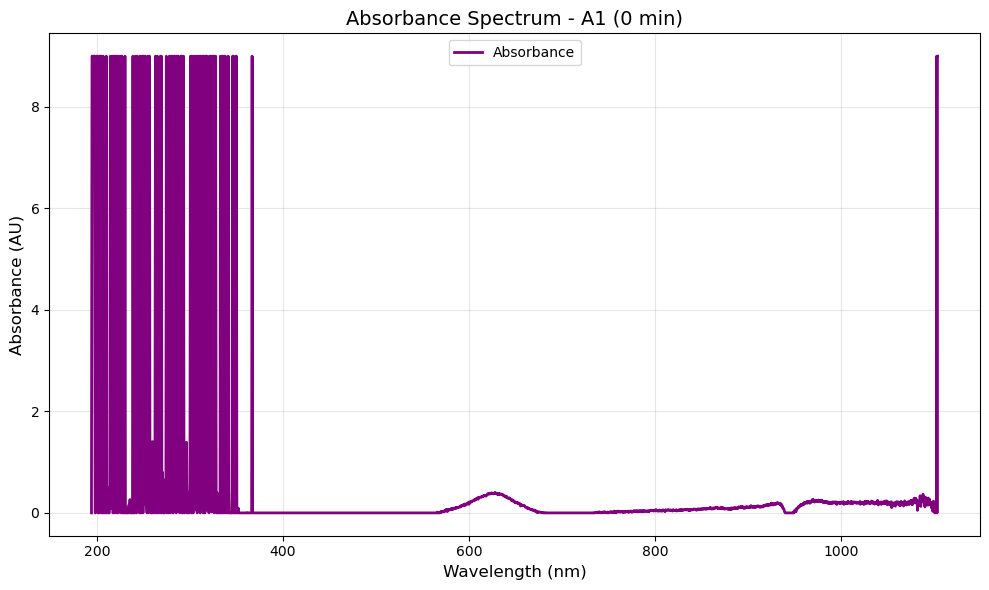

Collected Blue Spectrum
Washed Probe
Time to collect blue spectrum: 34.77567219734192 seconds
Plot saved to: C:\Users\ADITI\Downloads\Aditya\Axo_Jubilee\science-jubilee\axo\spectrum_data\testing_5\A2_0min_absorbance.png


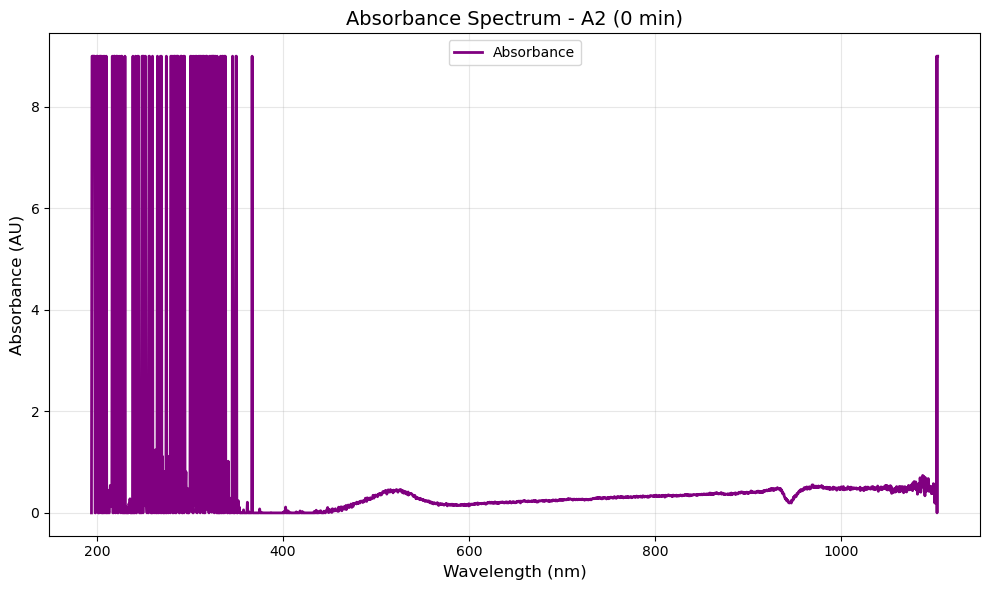

Collected Red Spectrum
Washed Probe
Time to collect red spectrum: 34.66545796394348 seconds
Plot saved to: C:\Users\ADITI\Downloads\Aditya\Axo_Jubilee\science-jubilee\axo\spectrum_data\testing_5\A1_0min_absorbance.png


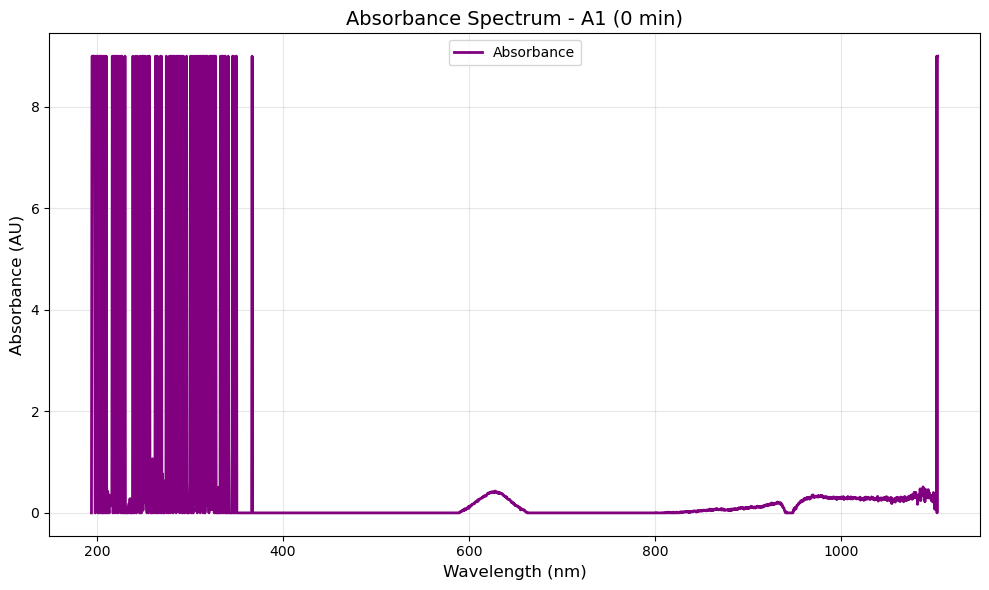

Collected Blue Spectrum
Washed Probe
Time to collect blue spectrum: 34.217753410339355 seconds
Plot saved to: C:\Users\ADITI\Downloads\Aditya\Axo_Jubilee\science-jubilee\axo\spectrum_data\testing_5\A2_0min_absorbance.png


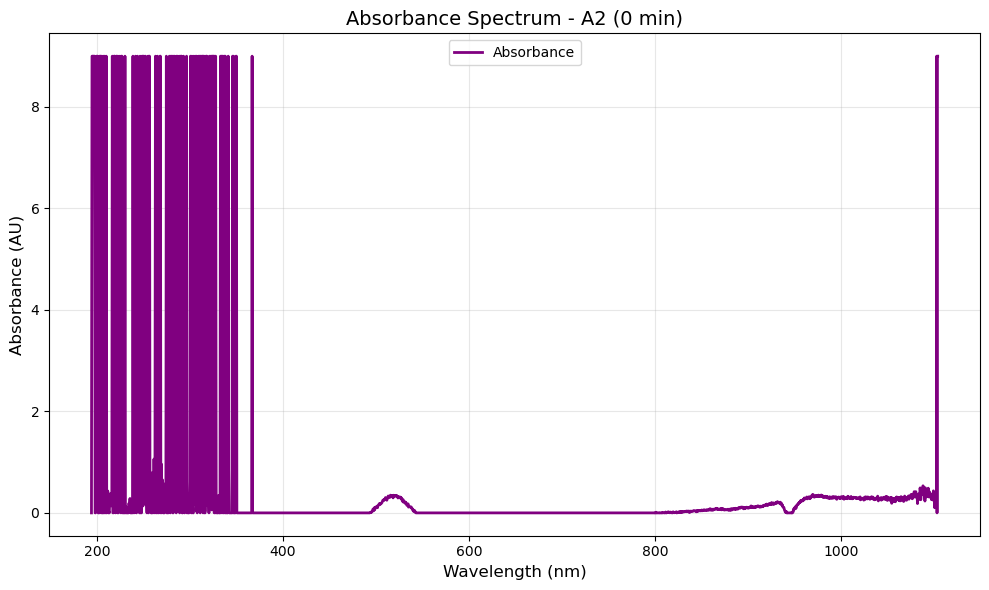

Collected Red Spectrum
Washed Probe
Time to collect red spectrum: 34.59210705757141 seconds
Parked Spectrometer


In [ ]:
# 8. Record vial spectrometer data 2-3 times
axo.pickup_tool(spectrometer)
print("Picked Up Spectrometer")

spectrometer.configure_device()
print("Configured Spectrometer")

for i in range(2):
    time1 = time.time()
    wavelengths_blue, vals_blue, absorbance_blue = spectrometer.collect_spectrum(samples2_spec[0].top(-45), 0, save= True)
    spectrometer.plot_spectrum(samples2_spec[0].top(-40), elapsed_min=0, show_plot=True, save_plot=True)  
    print("Collected Blue Spectrum")

    spectrometer.wash_probe(solvents[0].top(-35), n_cycles= 3)
    time2 = time.time()
    print("Washed Probe")
    print(f"Time to collect blue spectrum: {time2-time1} seconds")


    time3 = time.time()
    wavelengths_red, vals_red, absorbance_red = spectrometer.collect_spectrum(samples2_spec[1].top(-45), 0, save= True)
    spectrometer.plot_spectrum(samples2_spec[1].top(-40), elapsed_min=0, show_plot=True, save_plot=True)
    print("Collected Red Spectrum")

    spectrometer.wash_probe(solvents[0].top(-35), n_cycles= 3)
    time4 = time.time()
    print("Washed Probe")
    print(f"Time to collect red spectrum: {time4-time3} seconds")


axo.park_tool()
print("Parked Spectrometer")
